<a href="https://colab.research.google.com/github/annvix/Accents_LSTM-/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Клонирование проекта с GitHub
Подключение библиотек

In [1]:
!git clone https://github.com/annvix/Accents_LSTM-.git

Cloning into 'Accents_LSTM-'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 59 (delta 24), reused 34 (delta 8), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing import sequence

from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import random


# Загрузка и предобработка данных

In [2]:
with open('Accents_LSTM-/Data.csv', 'r') as f:
#with open('Data.csv', 'r') as f:
    all_accents = f.readlines()
data_len = len(all_accents)

random.shuffle(all_accents)

print('Всего слов:', data_len)

Всего слов: 1679079


Добавляем алфавит для кодирования букв

In [0]:
alphabet =   {'а' : 1, 'б' : 2, 'в' : 3, 'г' : 4, 'д' : 5, 'е' : 6, 'ё' : 7, 'ж' : 8, 'з' : 9,
             'и' : 10, 'й' : 11, 'к' : 12, 'л' : 13, 'м' : 14, 'н' : 15, 'о' : 16, 'п' : 17, 'р' : 18,
             'с' : 19, 'т' : 20, 'у' : 21, 'ф' : 22, 'х' : 23, 'ц' : 24, 'ч' : 25, 'ш' : 26, 'щ' : 27,
             'ъ' : 28, 'ы' : 29, 'ь' : 30, 'э' : 31, 'ю' : 32, 'я' : 33}

In [0]:
words, accents = [], []

Считываем строки из файла и делим на два массива: слова и слова с ударениями

In [0]:
for i in range(data_len):
    str = all_accents[i].replace('\n', '').split(',')
    words.append(str[0])
    accents.append(str[1])
max_len = len(max(words, key=len))

In [8]:
print('Максимальная длина слова:')
print(max_len)

Максимальная длина слова:
29


Создаем двумерные массивы, для хранения закодированных слов и их ударений.

Размерность для каждого слова - максимальное количество букв.

Если есть буква - то на ее месте будет ее код, если нет - то 0

In [0]:
words_int = np.zeros((data_len, max_len), dtype=int)
accents_int = np.zeros((data_len,max_len), dtype=int)

In [0]:
for i in range(data_len):
    for j in range(len(words[i])):
        words_int[i][j]= alphabet[words[i][j]]#ord(words[i][j])
        
    acc = accents[i].find(chr(39))
    if (acc != -1):
        accents_int[i][acc] = 1        
    else:
        ind_wa = i

Распечатаем несколько слов с их преобразованием

In [11]:
for i in range(10):
    print('Слово:    ', words[i * 100000])
    print('Ударение: ', accents[i * 100000])
    print('Вектор:   ', words_int[i * 100000])
    print('Ударение: ', accents_int[i * 100000])
    print()
print()
print("\t\t\t Слово без ударения:")
print('Слово:   ', words[ind_wa])
print('Вектор:  ', words_int[ind_wa])
print('Ударение:', accents_int[ind_wa])


Слово:     реваншах
Ударение:  рев'аншах
Вектор:    [18  6  3  1 15 26  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
Ударение:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Слово:     благоустраиваемся
Ударение:  благоустр'аиваемся
Вектор:    [ 2 13  1  4 16 21 19 20 18  1 10  3  1  6 14 19 33  0  0  0  0  0  0  0
  0  0  0  0  0]
Ударение:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Слово:     прирастающая
Ударение:  прираст'ающая
Вектор:    [17 18 10 18  1 19 20  1 32 27  1 33  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
Ударение:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Слово:     стилизовалась
Ударение:  стилизов'алась
Вектор:    [19 20 10 13 10  9 16  3  1 13  1 19 30  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
Ударение:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Слово:     огрубила
Ударение:  огруб'ила
Вектор:    [16  4 18 21  2 10 13  1  0  0  0  0  0  0  0  0  0  0  

Разделим данные на тренировочные, валидационные и тестовые

In [0]:
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1

def train_test_val_words(words_int):
    return (words_int[:int(len(words_int)*train_frac)], 
words_int[int(len(words_int)*train_frac) : (int(len(words_int)*train_frac) + int(len(words_int)*val_frac))], 
words_int[(int(len(words_int)*train_frac) + int(len(words_int)*val_frac)):])
    
def train_test_val_accents(accents_int):
    return (accents_int[:int(len(accents_int)*train_frac)], 
accents_int[int(len(accents_int)*train_frac) : (int(len(accents_int)*train_frac) + int(len(accents_int)*val_frac))], 
accents_int[(int(len(accents_int)*train_frac) + int(len(accents_int)*val_frac)):])

train_x, val_x, test_x = train_test_val_words(words_int)
train_y, val_y, test_y = train_test_val_accents(accents_int)



In [13]:
print("\t\t\t Размеры:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			 Размеры:
Train set: 		(1343263, 29) 
Validation set: 	(167907, 29) 
Test set: 		(167909, 29)


# Моделирование нейронной сети
Используется LSTM-сеть

In [0]:
max_features = len(alphabet) + 1
max_features

34

In [0]:
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = max_len, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(max_len, activation='relu'))
model.add(Dense(max_len, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 29)            986       
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80896     
_________________________________________________________________
dense (Dense)                (None, 29)                3741      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                870       
Total params: 86,493
Trainable params: 86,493
Non-trainable params: 0
_________________________________________________________________
None


Определим критерии для нейронной сети и запустим обучение


In [0]:
batch_size = 64
epochs = 7

print(u'Тренируем модель...')
history = model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_x, val_y))

Тренируем модель...
Epoch 1/7
20989/20989 [==============================] - 1026s 49ms/step - loss: 0.4853 - accuracy: 0.8055 - val_loss: 0.4123 - val_accuracy: 0.8357
Epoch 2/7
20989/20989 [==============================] - 1057s 50ms/step - loss: 0.4697 - accuracy: 0.8123 - val_loss: 0.3944 - val_accuracy: 0.8440
Epoch 3/7
20989/20989 [==============================] - 1057s 50ms/step - loss: 0.4589 - accuracy: 0.8167 - val_loss: 0.3881 - val_accuracy: 0.8437
Epoch 4/7
20989/20989 [==============================] - 1052s 50ms/step - loss: 0.4506 - accuracy: 0.8207 - val_loss: 0.3767 - val_accuracy: 0.8509
Epoch 5/7
20989/20989 [==============================] - 1100s 52ms/step - loss: 0.4425 - accuracy: 0.8240 - val_loss: 0.3665 - val_accuracy: 0.8549
Epoch 6/7
20989/20989 [==============================] - 1070s 51ms/step - loss: 0.4360 - accuracy: 0.8270 - val_loss: 0.3586 - val_accuracy: 0.8585
Epoch 7/7
20989/20989 [==============================] - 1065s 51ms/step - loss: 0.430

Построим графики для точности и функции стоимости относительно эпох

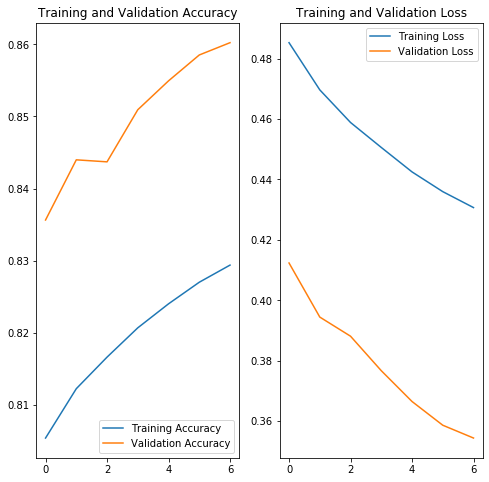

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Сохраним предобученную сеть

In [0]:
model.save('Accents_LSTM-/model.h5')
#model.save('model.h5')

Сохраним датасет и предобученную сеть на компьютер

In [0]:
files.download('Accents_LSTM-/Data.csv')
files.download('Accents_LSTM-/model.h5')

# Тесты на обученной модели

In [0]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, name='categorical_crossentropy'),
                  metrics=['accuracy'])

Предскажем позицию ударения для тестовых данных

In [0]:
acc_pred = model.predict(test_x)

test_accur = 0
for i in range(len(acc_pred)):
    if acc_pred[i].argmax() == test_y[i].argmax():
        test_accur = test_accur + 1
test_accur = test_accur/len(acc_pred)

In [14]:
print('Точность на тестовой выборке: ',test_accur)

NameError: ignored

Метод для возвращения ключа по значению

In [0]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

Визуализация предсказанных ударений и их сравнение с ответами

In [0]:
for i in range(10):
    slovo = ''
    for j in range(len(test_x[i])):
        if test_x[i][j] != 0:
            slovo = slovo + get_key(alphabet, test_x[i][j])
        else:
            break
    template = slovo[:test_y[i].argmax() + 1] + '\'' + slovo[test_y[i].argmax() + 1:]
    nn_sample = slovo[:acc_pred[i].argmax() + 1] + '\'' + slovo[acc_pred[i].argmax() + 1:]
    print('Эталон   : ' , template)
    print('Результат: ' , nn_sample)
    print()

Эталон   :  кочетко'ву
Результат:  кочетко'ву

Эталон   :  пружи'нясь
Результат:  пружиня'сь

Эталон   :  валтаса'р
Результат:  валтаса'р

Эталон   :  облицу'ем
Результат:  облицу'ем

Эталон   :  приво'лжью
Результат:  приво'лжью

Эталон   :  раскла'дывалось
Результат:  раскла'дывалось

Эталон   :  сле'пнет
Результат:  слепне'т

Эталон   :  верстака'м
Результат:  верста'кам

Эталон   :  опро'бованною
Результат:  опро'бованною

Эталон   :  сле'нге
Результат:  сле'нге

